In [ ]:
from qspectro2d.spectroscopy.calculations import *


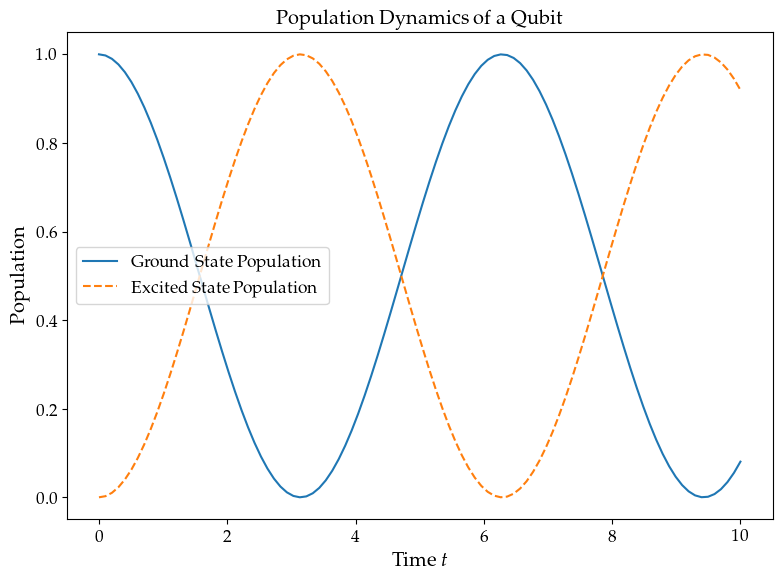

In [7]:
import numpy as np
from qutip import Qobj, mesolve, brmesolve, basis, sigmax, sigmaz, destroy, Options

# =============================
# TEST PARAMETERS
# =============================
# Define a simple 2-level system (qubit)
H = 0.5 * sigmax()  # Hamiltonian: Pauli-Z operator
initial_state = basis(2, 0)  # Ground state
times = np.linspace(0, 10, 100)  # Time array
decay_ops = [destroy(2)]  # Spontaneous emission operator
options = Options(store_states=True)  # Solver options

# =============================
# TEST FUNCTION
# =============================
def test_execute_single_evolution_segment(ODE_Solver):
    if ODE_Solver == "BR":
        result = brmesolve(H, initial_state, times, a_ops=[[decay_ops[0], lambda w: w]], options=options)
    else:
        result = mesolve(H, initial_state, times, c_ops=decay_ops, options=options)
    return result

# Run the test for master equation solver
result = test_execute_single_evolution_segment("BR")

# =============================
# VISUALIZE RESULTS
# =============================
import matplotlib.pyplot as plt

# Extract populations
populations = [state.diag() for state in result.states]

plt.figure(figsize=(8, 6))
plt.plot(times, [p[0] for p in populations], label="Ground State Population", color="C0", linestyle="solid")
plt.plot(times, [p[1] for p in populations], label="Excited State Population", color="C1", linestyle="dashed")
plt.xlabel(r"Time $t$")
plt.ylabel(r"Population")
plt.title(r"Population Dynamics of a Qubit")
plt.legend()
plt.tight_layout()
plt.show()